# K-Means Algorithm Demo

> ☝Before moving on with this demo you might want to take a look at:
> - 📗[Math behind the K-Means Algorithm](https://github.com/trekhleb/homemade-machine-learning/tree/master/homemade/k_means)
> - ⚙️[K-Means Algorithm Source Code](https://github.com/trekhleb/homemade-machine-learning/blob/master/homemade/k_means/k_means.py)

**K-means clustering** aims to partition _n_ observations into _K_ clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

> **Demo Project:** In this example we will try to cluster Iris flowers into tree categories that we don't know in advance based on `petal_length` and `petal_width` parameters using K-Means unsupervised learning algorithm.

In [1]:
# To make debugging of logistic_regression module easier we enable imported modules autoreloading feature.
# By doing this you may change the code of logistic_regression library and all these changes will be available here.
%load_ext autoreload
%autoreload 2

# Add project root folder to module loading paths.
import sys
sys.path.append('../..')

In [2]:
# Import 3rd party dependencies.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import custom logistic regression implementation.
from homemade.k_means import KMeans

In [3]:
# Load the data.
data = pd.read_csv('../../data/iris.csv')

# Print the data table.
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,SETOSA
1,4.9,3.0,1.4,0.2,SETOSA
2,4.7,3.2,1.3,0.2,SETOSA
3,4.6,3.1,1.5,0.2,SETOSA
4,5.0,3.6,1.4,0.2,SETOSA
5,5.4,3.9,1.7,0.4,SETOSA
6,4.6,3.4,1.4,0.3,SETOSA
7,5.0,3.4,1.5,0.2,SETOSA
8,4.4,2.9,1.4,0.2,SETOSA
9,4.9,3.1,1.5,0.1,SETOSA


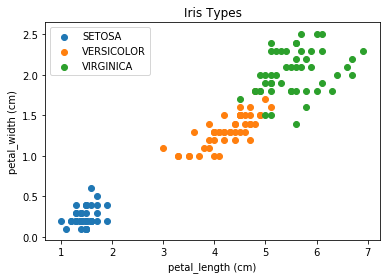

In [4]:
# List of suppported Iris classes.
iris_types = ['SETOSA', 'VERSICOLOR', 'VIRGINICA']

# Pick the Iris parameters for consideration.
x_axis = 'petal_length'
y_axis = 'petal_width'

# Plot the scatter for every type of Iris.
for iris_type in iris_types:
    plt.scatter(
        data[x_axis][data['class'] == iris_type],
        data[y_axis][data['class'] == iris_type],
        label=iris_type
    )

# Plot the data.    
plt.xlabel(x_axis + ' (cm)')
plt.ylabel(y_axis + ' (cm)')
plt.title('Iris Types')
plt.legend()
plt.show()

In [5]:
# Get total number of Iris examples.
num_examples = data.shape[0]

# Get features.
x_train = data[[x_axis, y_axis]].values.reshape((num_examples, 2))

In [6]:
num_clusters = 3
max_iterations = 50

k_means = KMeans(x_train, num_clusters)

(centroids, closest_centroids_ids) = k_means.train(max_iterations)

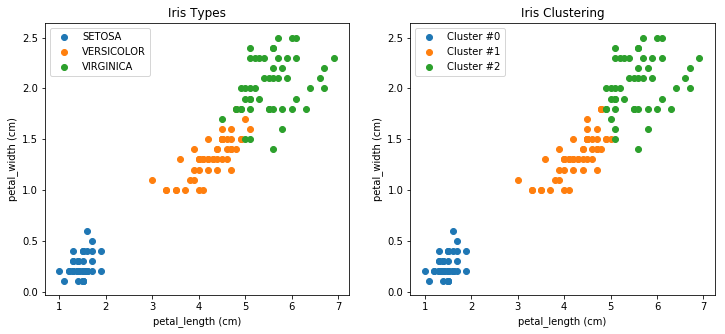

In [7]:
# List of suppported Iris classes.
iris_types = ['SETOSA', 'VERSICOLOR', 'VIRGINICA']

# Pick the Iris parameters for consideration.
x_axis = 'petal_length'
y_axis = 'petal_width'

# Make the plot a little bit bigger than default one.
plt.figure(figsize=(12, 5))

# Plot ACTUAL Iris flower classification.
plt.subplot(1, 2, 1)
for iris_type in iris_types:
    plt.scatter(
        data[x_axis][data['class'] == iris_type],
        data[y_axis][data['class'] == iris_type],
        label=iris_type
    )

# Plot the data.    
plt.xlabel(x_axis + ' (cm)')
plt.ylabel(y_axis + ' (cm)')
plt.title('Iris Types')
plt.legend()

# Plot UNSUPERWISED Iris flower classification.
plt.subplot(1, 2, 2)
for centroid_id, centroid in enumerate(centroids):
    current_examples_indices = (closest_centroids_ids == centroid_id).flatten()
    plt.scatter(
        data[x_axis][current_examples_indices],
        data[y_axis][current_examples_indices],
        label='Cluster #' + str(centroid_id)
    )

# Plot the data.    
plt.xlabel(x_axis + ' (cm)')
plt.ylabel(y_axis + ' (cm)')
plt.title('Iris Clustering')
plt.legend()

# Show all subplots.
plt.show()